# Ensemble Learning Project


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# Reading the datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test_final = pd.read_csv('X_test_final.csv')

In [7]:
# Consolidate in one dataframe Xtrain and ytrain
training_dataset = pd.merge(X_train, y_train, on='ID')

In [8]:
training_dataset.to_csv('training_dataset.csv', index=False)

### Data Understanding

#### Features data types

In [9]:
# Data format of the features
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


All the features are numerical features continuous (float64)

In [10]:
training_dataset.shape

(1494, 36)

In [11]:
print(training_dataset['COUNTRY'].value_counts())
print(training_dataset['COUNTRY'].value_counts(1))

COUNTRY
FR    851
DE    643
Name: count, dtype: int64
COUNTRY
FR    0.569612
DE    0.430388
Name: proportion, dtype: float64


#### Checking Missing Values

In [12]:
# Check for NaN values in the combined result
nan_values = training_dataset.isnull().sum()

# Calculate the percentage of missing values for each column
total_rows = len(training_dataset)
nan_percentage = (nan_values / total_rows) * 100

# Create a DataFrame to display both count and percentage of missing values
missing_info = pd.DataFrame({
    'Missing Values': nan_values,
    'Percentage': nan_percentage
})

# Display the NaN values count and percentage for each column
print("Missing values and percentage in each column:")
print(missing_info)

Missing values and percentage in each column:
                  Missing Values  Percentage
ID                             0    0.000000
DAY_ID                         0    0.000000
COUNTRY                        0    0.000000
DE_CONSUMPTION                 0    0.000000
FR_CONSUMPTION                 0    0.000000
DE_FR_EXCHANGE                25    1.673360
FR_DE_EXCHANGE                25    1.673360
DE_NET_EXPORT                124    8.299866
FR_NET_EXPORT                 70    4.685408
DE_NET_IMPORT                124    8.299866
FR_NET_IMPORT                 70    4.685408
DE_GAS                         0    0.000000
FR_GAS                         0    0.000000
DE_COAL                        0    0.000000
FR_COAL                        0    0.000000
DE_HYDRO                       0    0.000000
FR_HYDRO                       0    0.000000
DE_NUCLEAR                     0    0.000000
FR_NUCLEAR                     0    0.000000
DE_SOLAR                       0    0.000000
FR_SOLAR 

#### Checking outliers

In [13]:
# Grouping the features according their
commodities_weather_columns = ['GAS_RET',
                            'COAL_RET',
                            'CARBON_RET',
                            'DE_TEMP',
                            'FR_TEMP',
                            'DE_WIND',
                            'FR_WIND',
                            'DE_RAIN',
                            'FR_RAIN']

energy_columns = ['DE_GAS',
                            'FR_GAS',
                            'DE_COAL',
                            'FR_COAL',
                            'DE_HYDRO',
                            'FR_HYDRO',
                            'DE_NUCLEAR',
                            'FR_NUCLEAR',
                            'DE_SOLAR',
                            'FR_SOLAR',
                            'DE_WINDPOW',
                            'FR_WINDPOW',
                            'DE_LIGNITE']

electricity_columns = ['DE_CONSUMPTION',
                            'FR_CONSUMPTION',
                            'DE_RESIDUAL_LOAD',
                            'FR_RESIDUAL_LOAD',
                            'DE_NET_IMPORT',
                            'FR_NET_IMPORT',
                            'DE_NET_EXPORT',
                            'FR_NET_EXPORT',
                            'DE_FR_EXCHANGE',
                            'FR_DE_EXCHANGE']

#### Visualizing Outliers for Electricity use metrics





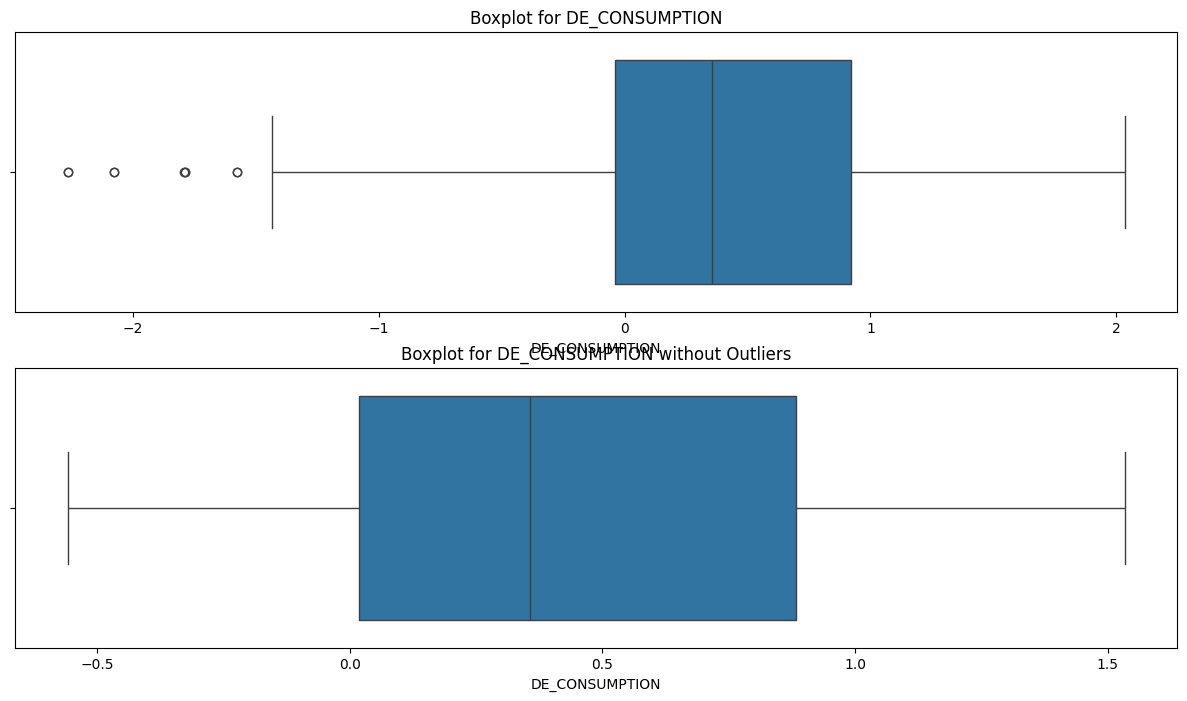

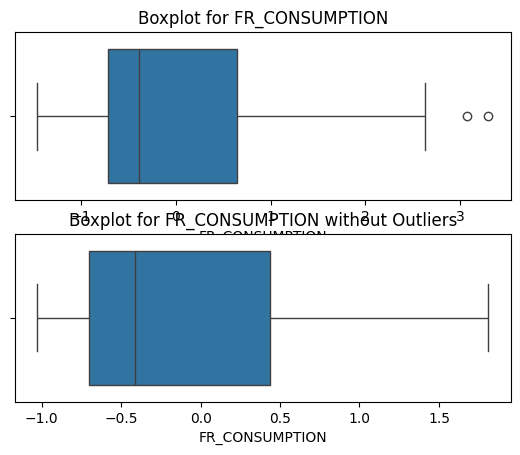

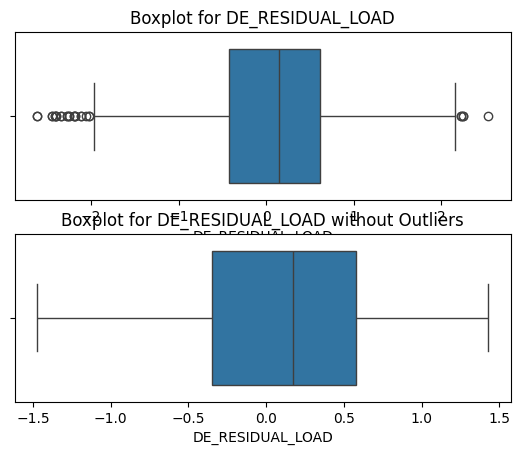

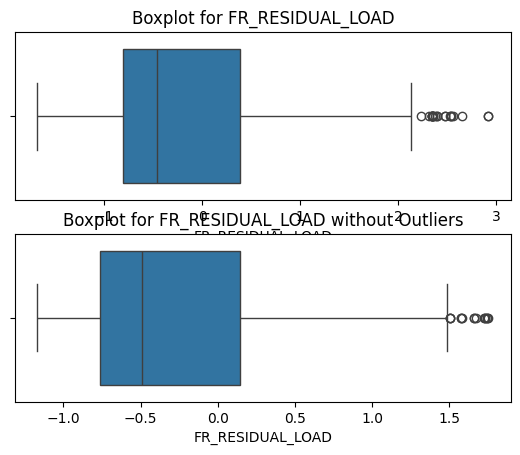

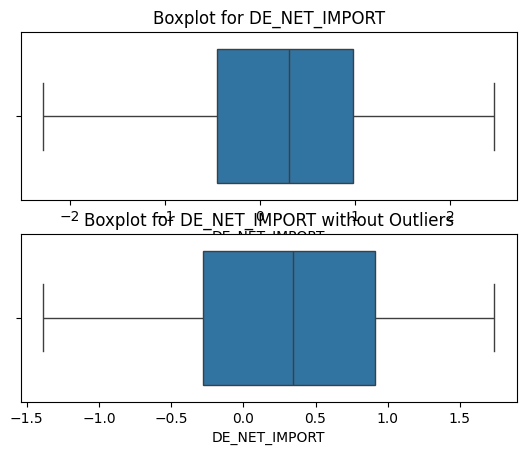

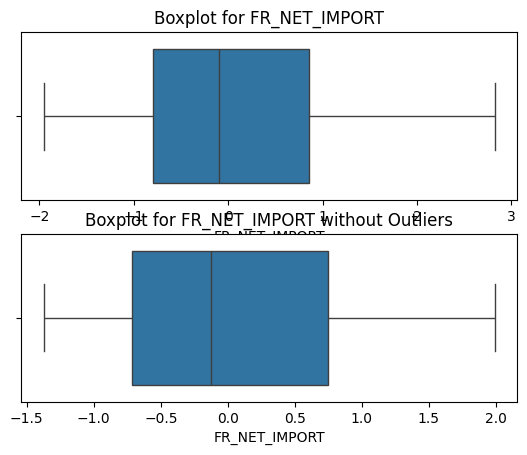

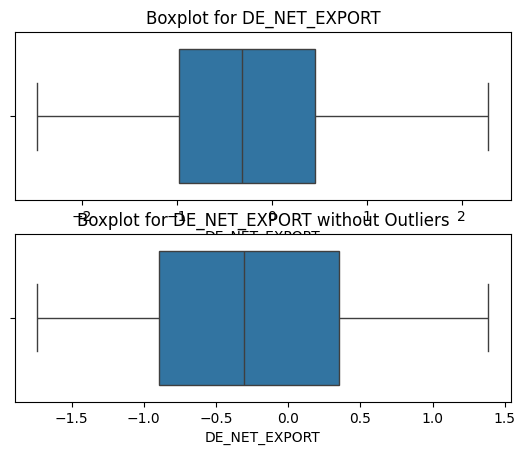

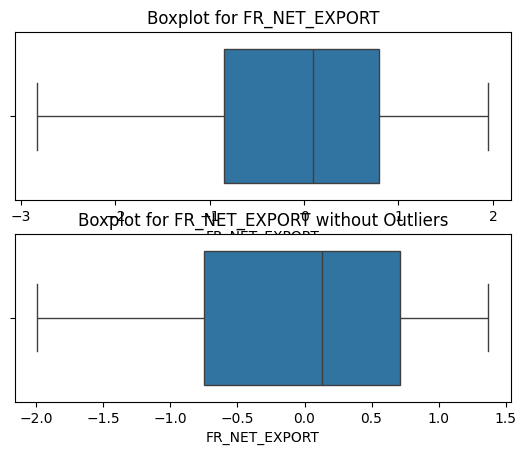

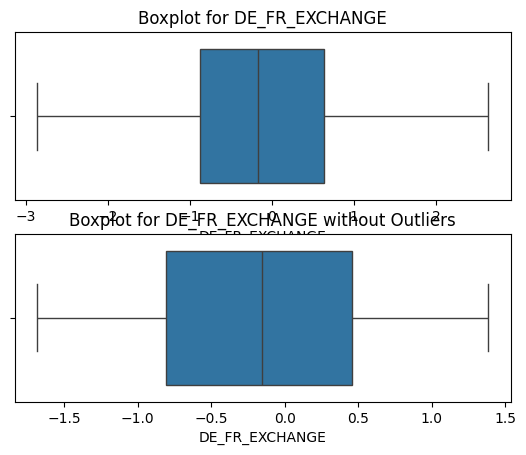

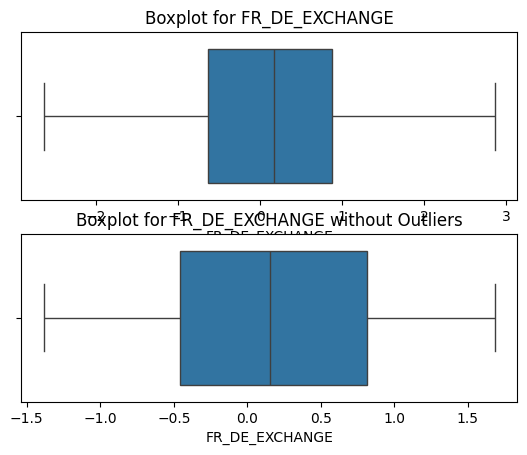

Number of outliers per feature:
DE_CONSUMPTION: 149 outliers
FR_CONSUMPTION: 148 outliers
DE_RESIDUAL_LOAD: 149 outliers
FR_RESIDUAL_LOAD: 150 outliers
DE_NET_IMPORT: 137 outliers
FR_NET_IMPORT: 144 outliers
DE_NET_EXPORT: 137 outliers
FR_NET_EXPORT: 144 outliers
DE_FR_EXCHANGE: 148 outliers
FR_DE_EXCHANGE: 148 outliers

Summary of the new DataFrame without outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 5 to 1493
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                825 non-null    int64  
 1   DAY_ID            825 non-null    int64  
 2   COUNTRY           825 non-null    object 
 3   DE_CONSUMPTION    825 non-null    float64
 4   FR_CONSUMPTION    825 non-null    float64
 5   DE_FR_EXCHANGE    825 non-null    float64
 6   FR_DE_EXCHANGE    825 non-null    float64
 7   DE_NET_EXPORT     825 non-null    float64
 8   FR_NET_EXPORT     825 non-null    float64
 9   DE_NET_

In [23]:
# Create boxplots to visualize outliers and identify outliers based on percentiles
outliers_count = {}
outliers_dataframes = {}  # Dictionary to store DataFrames with outliers for each feature

# New DataFrame without outliers
data_train_no_outliers = training_dataset.copy()

plt.figure(figsize=(15, 8))

for feature in electricity_columns:
    # Boxplot for visualization
    plt.subplot(2, 1, 1)
    sns.boxplot(x=training_dataset[feature])
    plt.title(f'Boxplot for {feature}')

    # Identify outliers based on percentiles
    lower_bound = training_dataset[feature].quantile(0.05)
    upper_bound = training_dataset[feature].quantile(0.95)

    # Count outliers
    outliers = training_dataset[(training_dataset[feature] < lower_bound) | (training_dataset[feature] > upper_bound)]
    outliers_count[feature] = outliers.shape[0]

    # Store DataFrame with outliers in the dictionary
    outliers_dataframes[feature] = outliers

    # Remove outliers from the new DataFrame
    data_train_no_outliers = data_train_no_outliers[(data_train_no_outliers[feature] >= lower_bound) & (data_train_no_outliers[feature] <= upper_bound)]

    # Boxplot for visualization without outliers
    plt.subplot(2, 1, 2)
    sns.boxplot(x=data_train_no_outliers[feature])
    plt.title(f'Boxplot for {feature} without Outliers')

    plt.show()

# Display the count of outliers for each feature
print("Number of outliers per feature:")
for feature, count in outliers_count.items():
    print(f"{feature}: {count} outliers")

# Display summary of the new DataFrame without outliers
print("\nSummary of the new DataFrame without outliers:")
print(data_train_no_outliers.info())


#### Visualizing Outliers for Commodity features

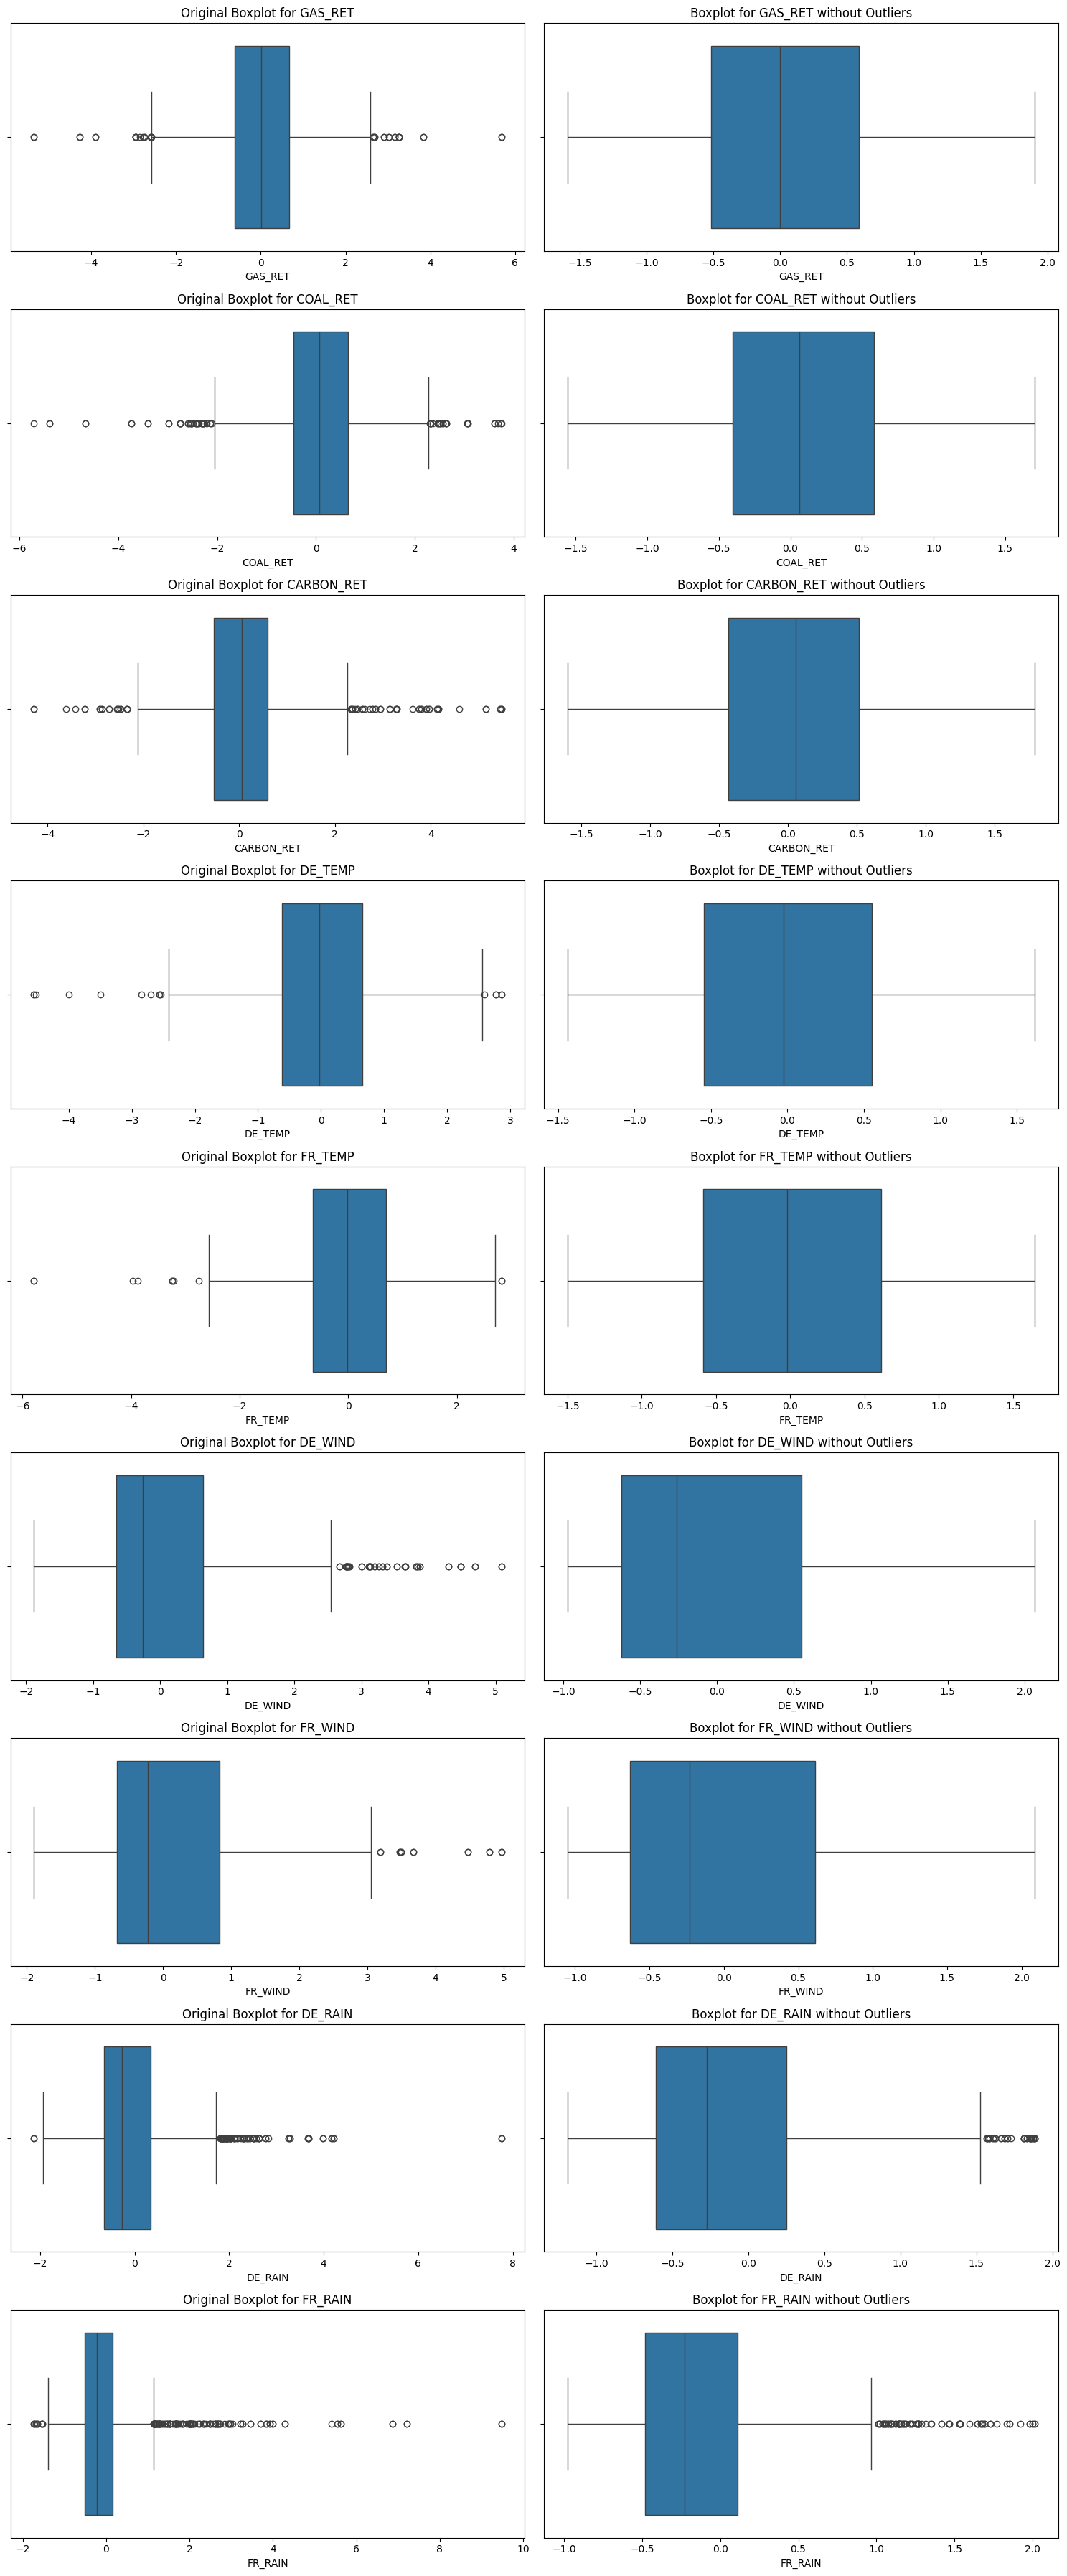


Summary of handling outliers:
Original DataFrame shape: (1494, 36)
New DataFrame without outliers shape: (639, 36)


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'training_dataset' is your DataFrame and 'commodities_weather_columns' is the list of features to check for outliers
# Example:
# commodities_weather_columns = ['feature1', 'feature2', ...]

# New DataFrame without outliers
data_train_no_outliers = training_dataset.copy()

# Prepare the figure layout
n_features = len(commodities_weather_columns)
fig, axes = plt.subplots(n_features, 2, figsize=(15, n_features * 4))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop through each feature to visualize and handle outliers
for i, feature in enumerate(commodities_weather_columns):
    # Original data boxplot
    sns.boxplot(x=training_dataset[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Original Boxplot for {feature}')

    # Identify outliers based on percentiles
    lower_bound = training_dataset[feature].quantile(0.05)
    upper_bound = training_dataset[feature].quantile(0.95)

    # Filtering out the outliers
    filtered_data = training_dataset[(training_dataset[feature] >= lower_bound) & (training_dataset[feature] <= upper_bound)]

    # Boxplot without outliers
    sns.boxplot(x=filtered_data[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {feature} without Outliers')

    # Update the new DataFrame by removing identified outliers
    data_train_no_outliers = data_train_no_outliers[(data_train_no_outliers[feature] >= lower_bound) & (data_train_no_outliers[feature] <= upper_bound)]

plt.tight_layout()
plt.show()

# Summary of outliers handling
print("\nSummary of handling outliers:")
print(f"Original DataFrame shape: {training_dataset.shape}")
print(f"New DataFrame without outliers shape: {data_train_no_outliers.shape}")


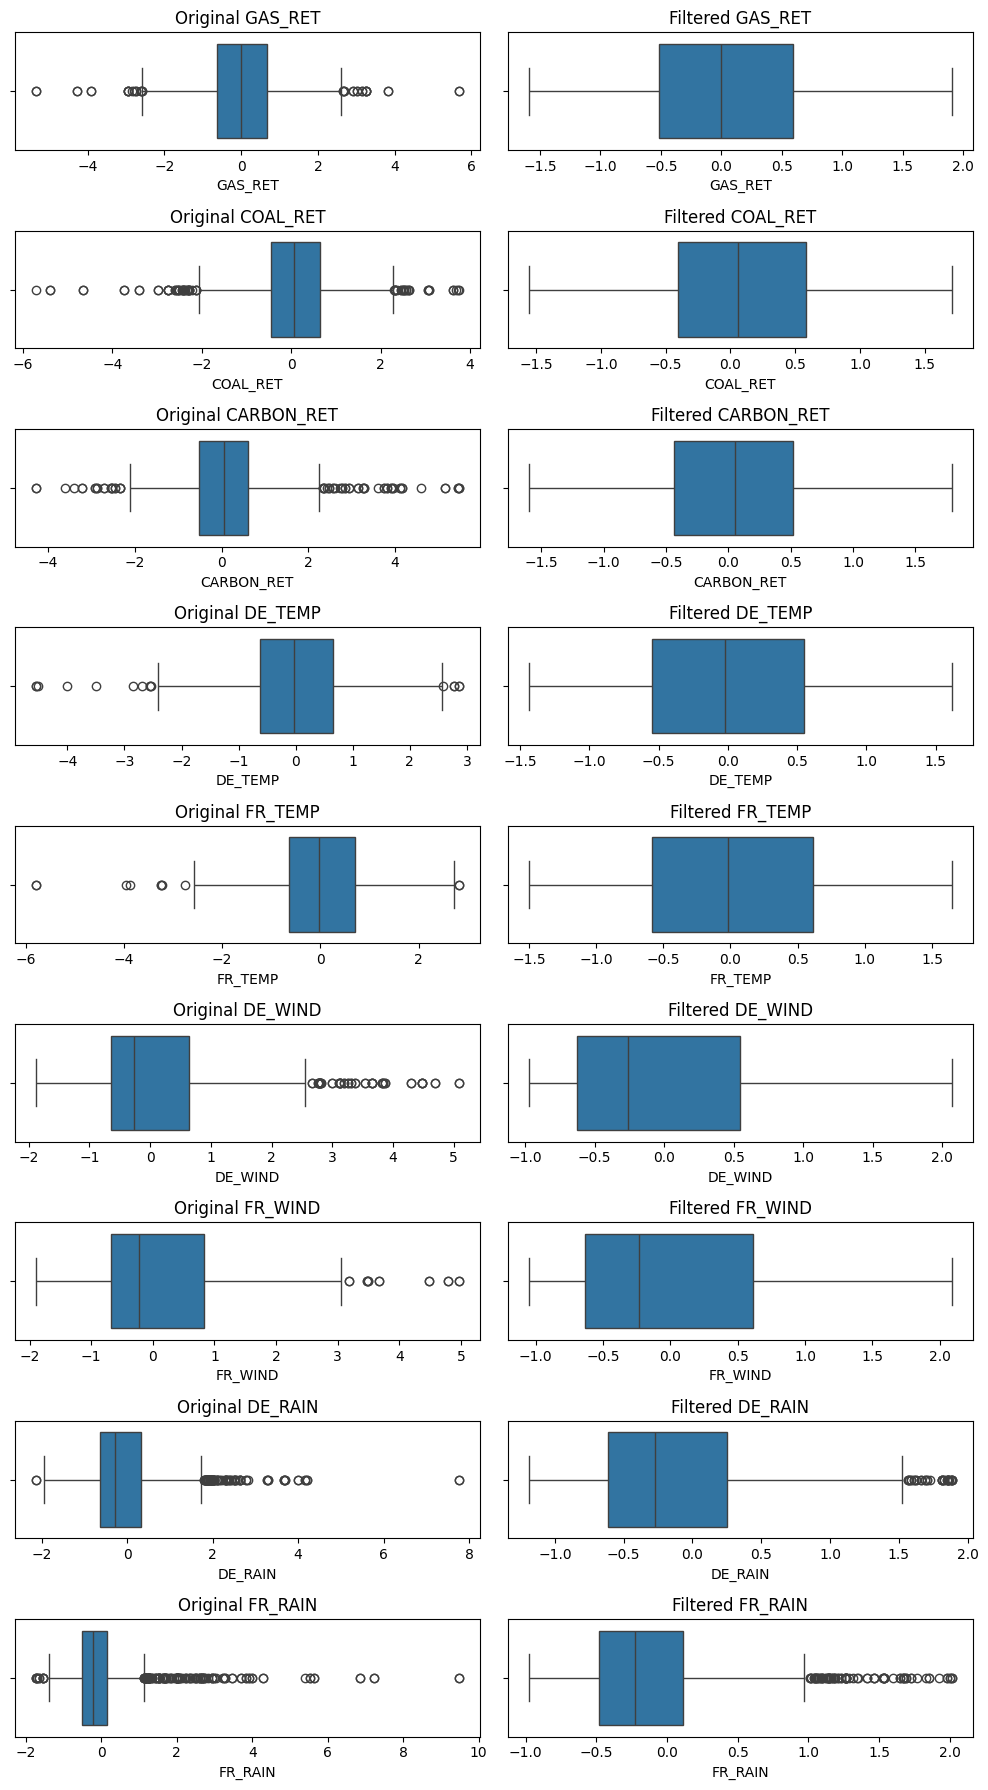


Summary:
Original DataFrame shape: (1494, 36)
After removing outliers shape: (1262, 36)


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Adjusting these parameters to make the plots smaller
fig_width = 10  # Adjust figure width
fig_height_per_row = 2  # Adjust height per feature row

# Calculate the total figure height
total_fig_height = fig_height_per_row * len(commodities_weather_columns)

# Prepare the figure layout with adjusted size
fig, axes = plt.subplots(len(commodities_weather_columns), 2, figsize=(fig_width, total_fig_height))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Check if commodities_weather_columns is a single element list to adjust indexing for axes
single_feature = len(commodities_weather_columns) == 1

for i, feature in enumerate(commodities_weather_columns):
    ax1 = axes[i, 0] if not single_feature else axes[0]
    ax2 = axes[i, 1] if not single_feature else axes[1]

    # Original data boxplot
    sns.boxplot(x=training_dataset[feature], ax=ax1)
    ax1.set_title(f'Original {feature}')

    # Filter data to remove outliers
    lower_bound = training_dataset[feature].quantile(0.05)
    upper_bound = training_dataset[feature].quantile(0.95)
    filtered_data = training_dataset[(training_dataset[feature] >= lower_bound) & (training_dataset[feature] <= upper_bound)]

    # Boxplot without outliers
    sns.boxplot(x=filtered_data[feature], ax=ax2)
    ax2.set_title(f'Filtered {feature}')

# Adjust layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()

# Summary
print("\nSummary:")
print(f"Original DataFrame shape: {training_dataset.shape}")
print(f"After removing outliers shape: {filtered_data.shape}")


#### Visualizing Outliers for Energy features

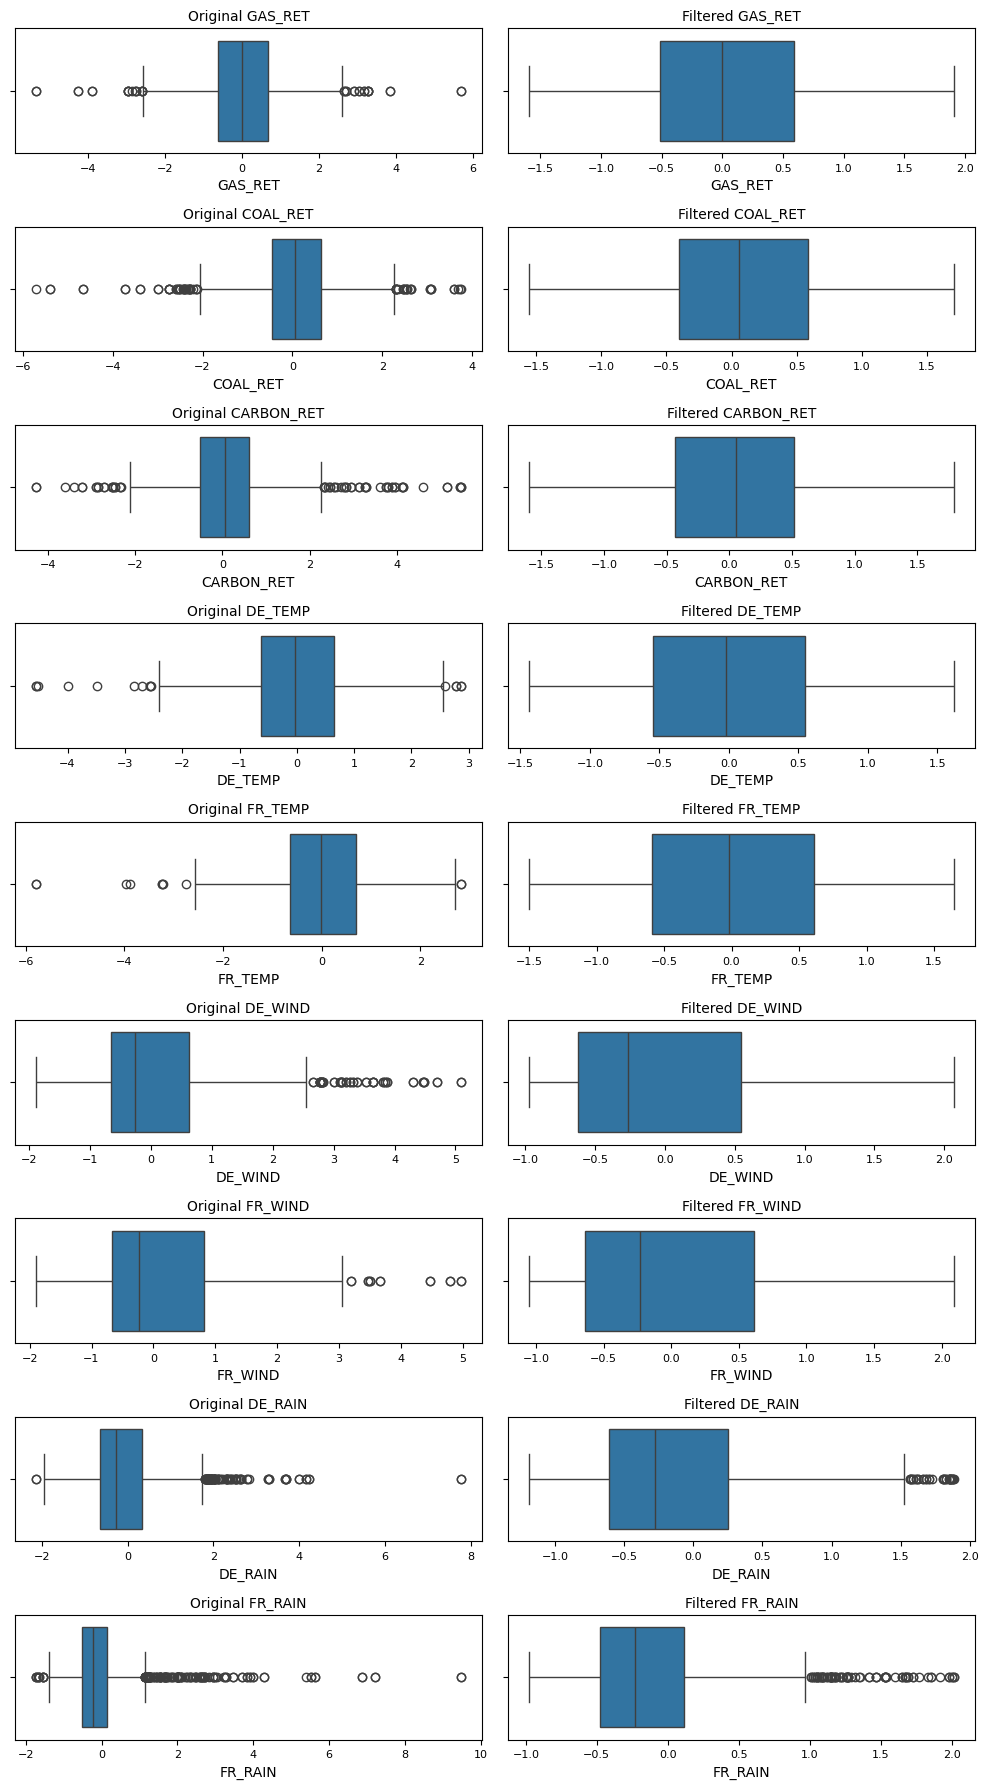


Summary:
Original DataFrame shape: (1494, 36)
After removing outliers shape: (1262, 36)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Adjust figure size and layout
fig_width = 10  # Figure width
fig_height_per_row = 2  # Height per feature row
total_fig_height = fig_height_per_row * len(commodities_weather_columns)  # Total figure height

fig, axes = plt.subplots(len(commodities_weather_columns), 2, figsize=(fig_width, total_fig_height))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Text size adjustments
title_fontsize = 10  # Smaller title font size
label_fontsize = 8  # Smaller label font size

for i, feature in enumerate(commodities_weather_columns):
    ax1 = axes[i, 0] if len(commodities_weather_columns) > 1 else axes[0]
    ax2 = axes[i, 1] if len(commodities_weather_columns) > 1 else axes[1]

    # Original data boxplot
    sns.boxplot(x=training_dataset[feature], ax=ax1)
    ax1.set_title(f'Original {feature}', fontsize=title_fontsize)
    ax1.tick_params(axis='x', labelsize=label_fontsize)  # Adjust tick label size

    # Filter data to remove outliers
    lower_bound = training_dataset[feature].quantile(0.05)
    upper_bound = training_dataset[feature].quantile(0.95)
    filtered_data = training_dataset[(training_dataset[feature] >= lower_bound) & (training_dataset[feature] <= upper_bound)]

    # Boxplot without outliers
    sns.boxplot(x=filtered_data[feature], ax=ax2)
    ax2.set_title(f'Filtered {feature}', fontsize=title_fontsize)
    ax2.tick_params(axis='x', labelsize=label_fontsize)  # Adjust tick label size

plt.tight_layout()
plt.show()

# Summary
print("\nSummary:")
print(f"Original DataFrame shape: {training_dataset.shape}")
print(f"After removing outliers shape: {filtered_data.shape}")


#### Features with outliers:

Electricity use measures
- X_CONSUMPTION
- X_RESIDUAL LOAD

Commodities variation and weather features:
- GAS_RET
- COAL_RET
- CARBON_RET
- X_TEMP
- X_RAIN
- X_WIND

Energy Production:
- FR_COAL
- X_HYDRO
- X_WINDPOW
- X_LIGNITE
- DE_NUCLEAR

### Splitting Data Set

We will create one model for each country

In [17]:
germany_info = ['ID','DAY_ID','GAS_RET',
                            'COAL_RET',
                            'CARBON_RET',
                            'DE_TEMP',
                            'DE_WIND',
                            'DE_RAIN',
                            'DE_GAS',
                            'DE_COAL',
                            'DE_HYDRO',
                            'DE_NUCLEAR',
                            'DE_SOLAR',
                            'DE_WINDPOW',
                            'DE_LIGNITE',
                            'DE_CONSUMPTION',
                            'DE_RESIDUAL_LOAD',
                            'DE_NET_IMPORT',
                            'DE_NET_EXPORT',
                            'DE_FR_EXCHANGE',
                            'FR_DE_EXCHANGE',
                            'TARGET']

france_info = ['ID','DAY_ID','GAS_RET',
                            'COAL_RET',
                            'CARBON_RET',
                            'FR_TEMP',
                            'FR_WIND',
                            'FR_RAIN',
                            'FR_GAS',
                            'FR_COAL',
                            'FR_HYDRO',
                            'FR_NUCLEAR',
                            'FR_SOLAR',
                            'FR_WINDPOW',
                            'FR_CONSUMPTION',
                            'FR_RESIDUAL_LOAD',
                            'FR_NET_IMPORT',
                            'FR_NET_EXPORT',
                            'DE_FR_EXCHANGE',
                            'FR_DE_EXCHANGE',
                            'TARGET']

In [18]:
# Separate the datasets base on the country
germany_dataset = training_dataset[training_dataset['COUNTRY'] == 'DE']
france_dataset = training_dataset[training_dataset['COUNTRY'] == 'FR']

germany_dataset = germany_dataset[germany_info]
france_dataset = france_dataset[france_info]

### Pre-Processing

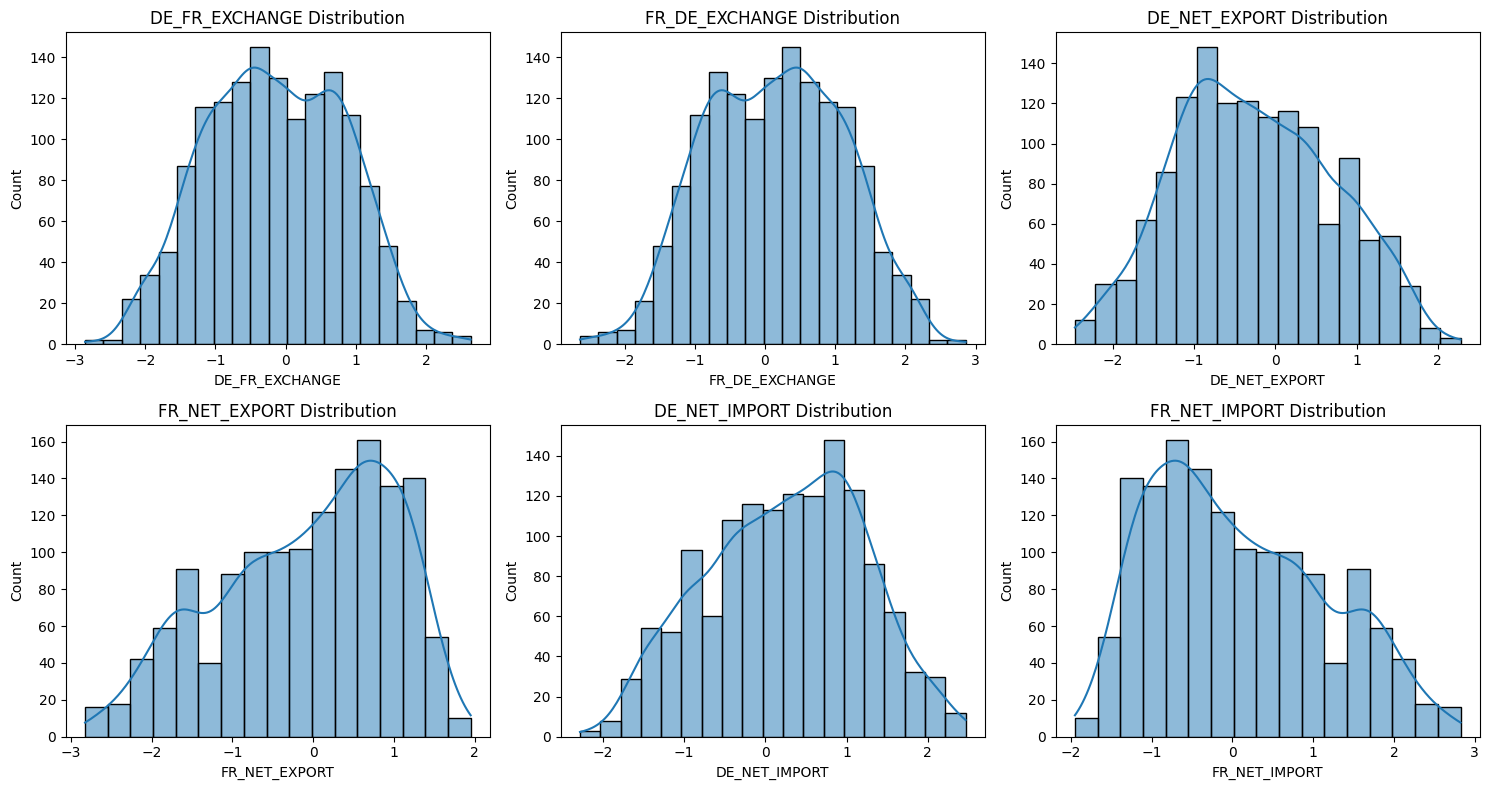

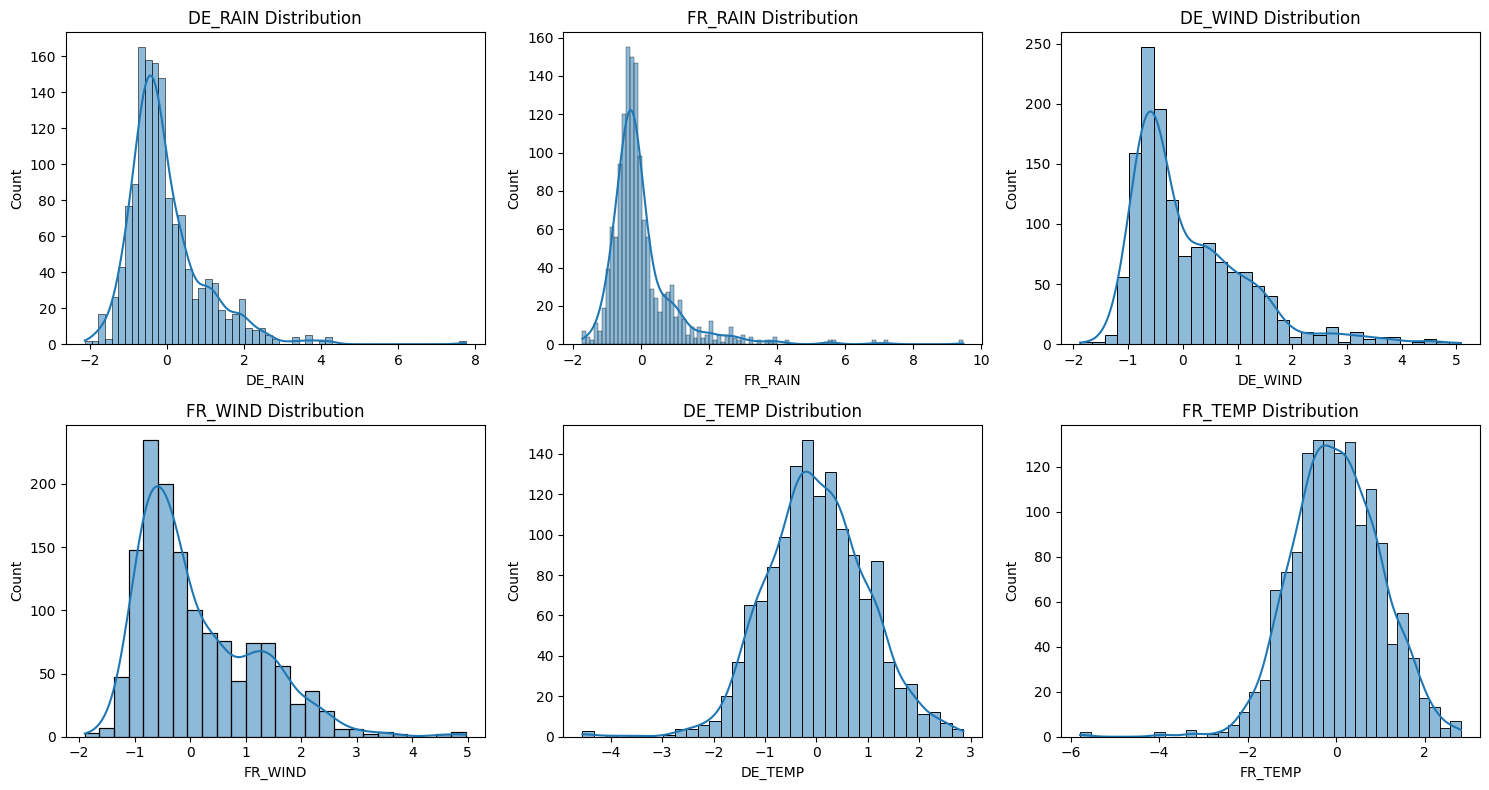

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'training_dataset' is your DataFrame

# Features without outliers
features_no_outliers = ['DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT']

# Features with outliers
features_with_outliers = ['DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP']

# Set up subplots for features without outliers
num_rows_no_outliers, num_cols_no_outliers = 2, len(features_no_outliers) // 2
fig_no_outliers, axes_no_outliers = plt.subplots(nrows=num_rows_no_outliers, ncols=num_cols_no_outliers, figsize=(15, 8))

# Plot histograms and kernel density plots for features without outliers
for i, feature in enumerate(features_no_outliers):
    row, col = divmod(i, num_cols_no_outliers)
    sns.histplot(training_dataset[feature], kde=True, ax=axes_no_outliers[row, col])
    axes_no_outliers[row, col].set_title(f'{feature} Distribution')

# Adjust layout for features without outliers
plt.tight_layout()
plt.show()

# Set up subplots for features with outliers
num_rows_with_outliers, num_cols_with_outliers = 2, len(features_with_outliers) // 2
fig_with_outliers, axes_with_outliers = plt.subplots(nrows=num_rows_with_outliers, ncols=num_cols_with_outliers, figsize=(15, 8))

# Plot histograms and kernel density plots for features with outliers
for i, feature in enumerate(features_with_outliers):
    row, col = divmod(i, num_cols_with_outliers)
    sns.histplot(training_dataset[feature], kde=True, ax=axes_with_outliers[row, col])
    axes_with_outliers[row, col].set_title(f'{feature} Distribution')

# Adjust layout for features with outliers
plt.tight_layout()
plt.show()


Columns with missing values:
- DE_FR_EXCHANGE
- FR_DE_EXCHANGE
- DE_NET_EXPORT
- FR_NET_EXPORT
- DE_NET_IMPORT
- FR_NET_IMPORT
- DE_RAIN
- FR_RAIN
- DE_WIND
- FR_WIND
- DE_TEMP
- FR_TEMP

In [20]:
# Features no skewed
features_no_skewed_fr = ['DE_FR_EXCHANGE', 'FR_DE_EXCHANGE']
features_no_skewed_de = ['DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT']

# Features with outliers
features_skewed_fr = ['FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_RAIN', 'FR_WIND', 'FR_TEMP']
features_skewed_de = ['DE_NET_IMPORT','DE_RAIN', 'DE_WIND', 'DE_TEMP']


# Impute missing values with mean for features without outliers
france_dataset[features_no_skewed_fr] = france_dataset[features_no_skewed_fr].fillna(france_dataset[features_no_skewed_fr].mean())
germany_dataset[features_no_skewed_de] = germany_dataset[features_no_skewed_de].fillna(germany_dataset[features_no_skewed_de].mean())


# Impute missing values with median for features with outliers
france_dataset[features_skewed_fr] = france_dataset[features_skewed_fr].fillna(france_dataset[features_skewed_fr].median())
germany_dataset[features_skewed_de] = germany_dataset[features_skewed_de].fillna(germany_dataset[features_skewed_de].median())

In [21]:
france_dataset.to_csv('france_dataset.csv', index=False)
germany_dataset.to_csv('germany_dataset.csv',index=False)